# References
## Eccles et al. (1961)
* When there was a smooth decline in the frequency of the repetitive response evoked by a maximal antidromic volley, progressive weakening of the synaptic excitation caused a shortening of the response and a more rapid decline of the frequency.

## Uchiyama et al. (2003a)
*  Renshaw cell firing patterns evoked by single-pulse submaximal or maximal activation of the medial gastrocnemius nerve is a long burst of spikes, starting at an instantaneous maximum firing rate of approximately 1600 pps and then decaying to lower rates.
* Synaptic swellings are indications of the strength of an $\alpha$ motoneuron's synaptic inputs to other spinal neurons. The proportions used are those reported by Cullheim and Kellerth (1978), in which FF number is ca. 1.8 the FR number and ca. 2.2 the S number.

# Parameters adjusted
* Conductances and connectivity

# Considerations
* Both papers used medial gastrocnemius nerves, but in Eccles et al. (1961) I could not find an exact equivalence of what is shown in Uchiyama et al. (2003a). However, I will use the latter, since the global behavior is depicted more clearly there.
* Sometimes, a Renshaw cell that did not fire at a certain stimulation intensity fired at an even lower intensity. This does not seem to be right and need investigation.
* The burst is not firing tens of miliseconds as described in literature. On the other hand, the initial firing rate is not bad.

In [1]:
import sys
import time

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import scipy.optimize

<IPython.core.display.Javascript object>


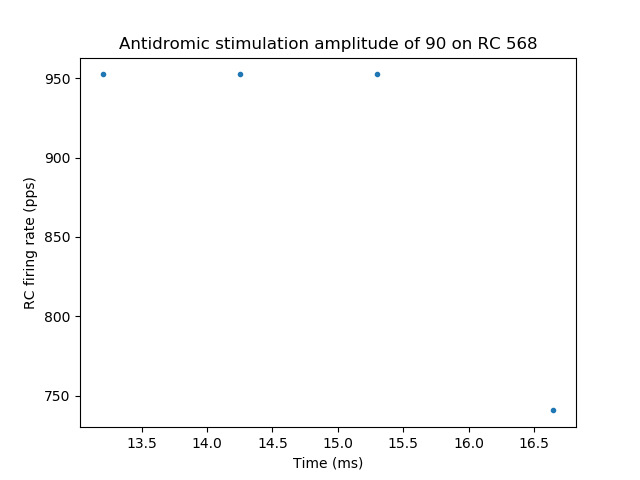

<IPython.core.display.Javascript object>


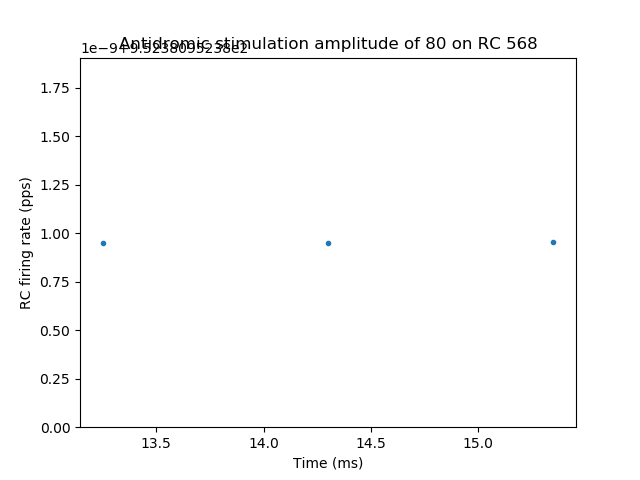

<IPython.core.display.Javascript object>


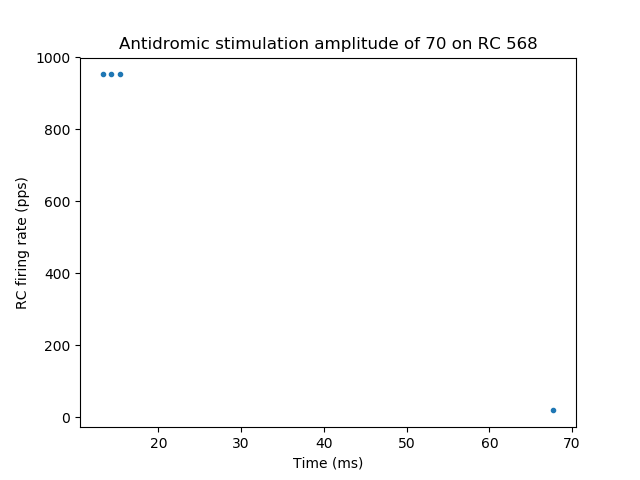

<IPython.core.display.Javascript object>


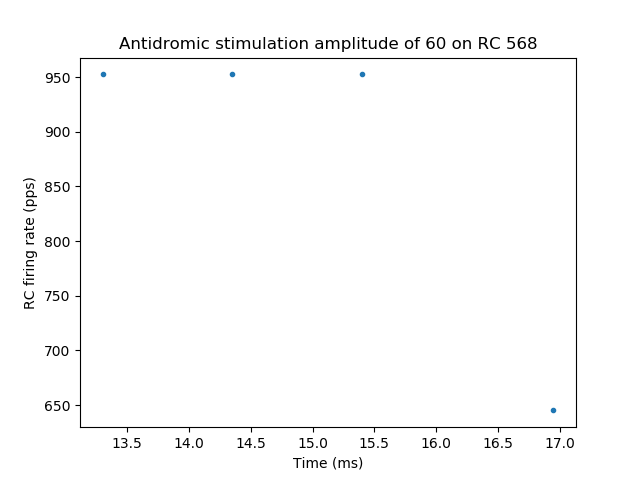

<IPython.core.display.Javascript object>


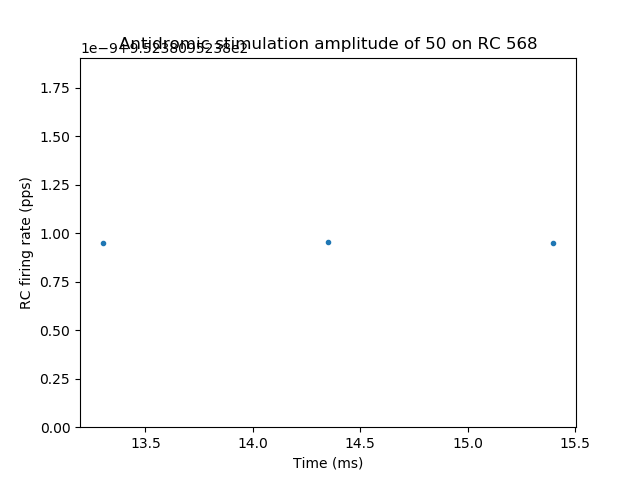

In [23]:
availableRCs = range(600)
recordedRCIndex = np.random.choice(availableRCs)
amps = [90, 80, 70, 60, 50]

for i, amp in enumerate(amps):
    instFR = []
    unitNumber = []
    spikeInstant = []
    
    filename = 'output'+str(i+1)+'.dat'
    f = open(filename, 'r')
    lines = f.readlines()
    for line in lines:
        spikeInstant.append(float(line.split()[0]))
        unitNumber.append(int(float(line.split()[1])))
    f.close()
    
    RCSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==recordedRCIndex]
    for i in range(len(RCSpikeInstants)-1):
        instFR = np.append(instFR, [1000/(RCSpikeInstants[i+1]-RCSpikeInstants[i])])
        
    del RCSpikeInstants[0]
    plt.figure()
    plt.plot(RCSpikeInstants, instFR, '.')
    plt.title('Antidromic stimulation amplitude of '+str(amp)+ ' on RC '+str(recordedRCIndex))
    plt.ylabel('RC firing rate (pps)')
    plt.xlabel('Time (ms)')
    plt.show()